In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [97]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col=0,parse_dates=True,dayfirst=False)


In [82]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [98]:
df = df.loc[~((df.value<df.value.quantile(0.025))|
              (df.value>df.value.quantile(0.975)))]

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')]

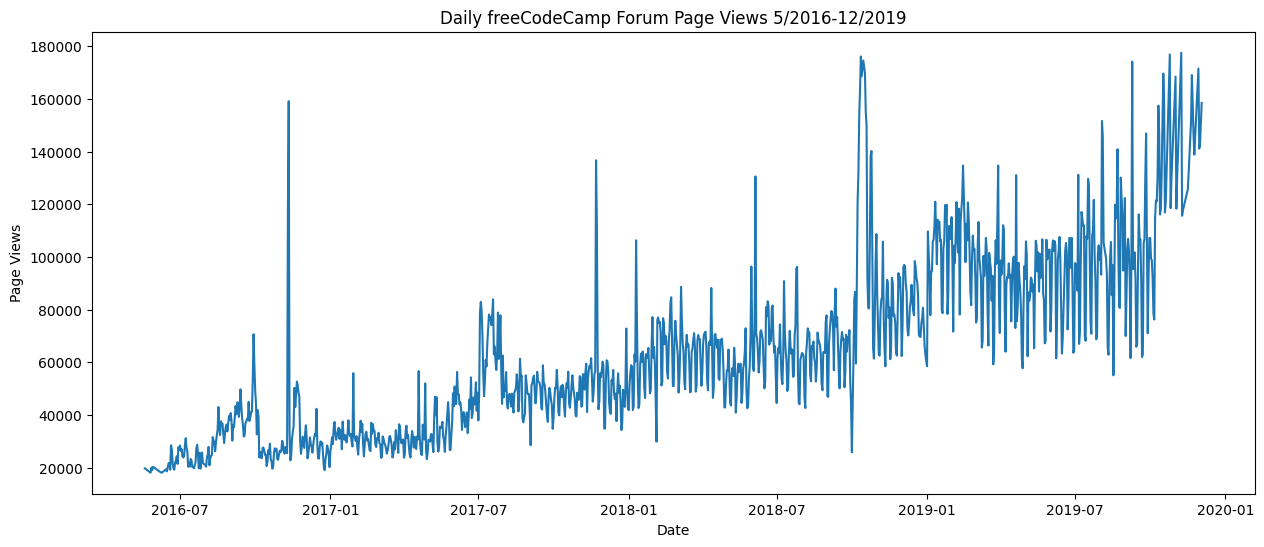

In [99]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df,color='red',legend=False)
ax.set(xlabel='Date',ylabel='Page Views',title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


In [85]:
df_bar = df.copy()
df_bar['year'] = df.index.year
df_bar['month'] = df.index.month_name()


In [86]:
df_bar = pd.DataFrame(df_bar.groupby(["year", "month"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "average_page_views"})
df_bar = df_bar.reset_index()

In [87]:
missing_data = {
        "year": [2016, 2016, 2016, 2016],
        "month": ['January', 'February', 'March', 'April'],
        "average_page_views": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

In [88]:
df_bar.head()

,year,month,average_page_views
0,2016,January,0
1,2016,February,0
2,2016,March,0
3,2016,April,0
0,2016,May,19432


C:\Users\islam\AppData\Local\Temp\ipykernel_5772\2038764311.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0, 0.5, 'Average Page Views'), Text(0.5, 0, 'Years')]

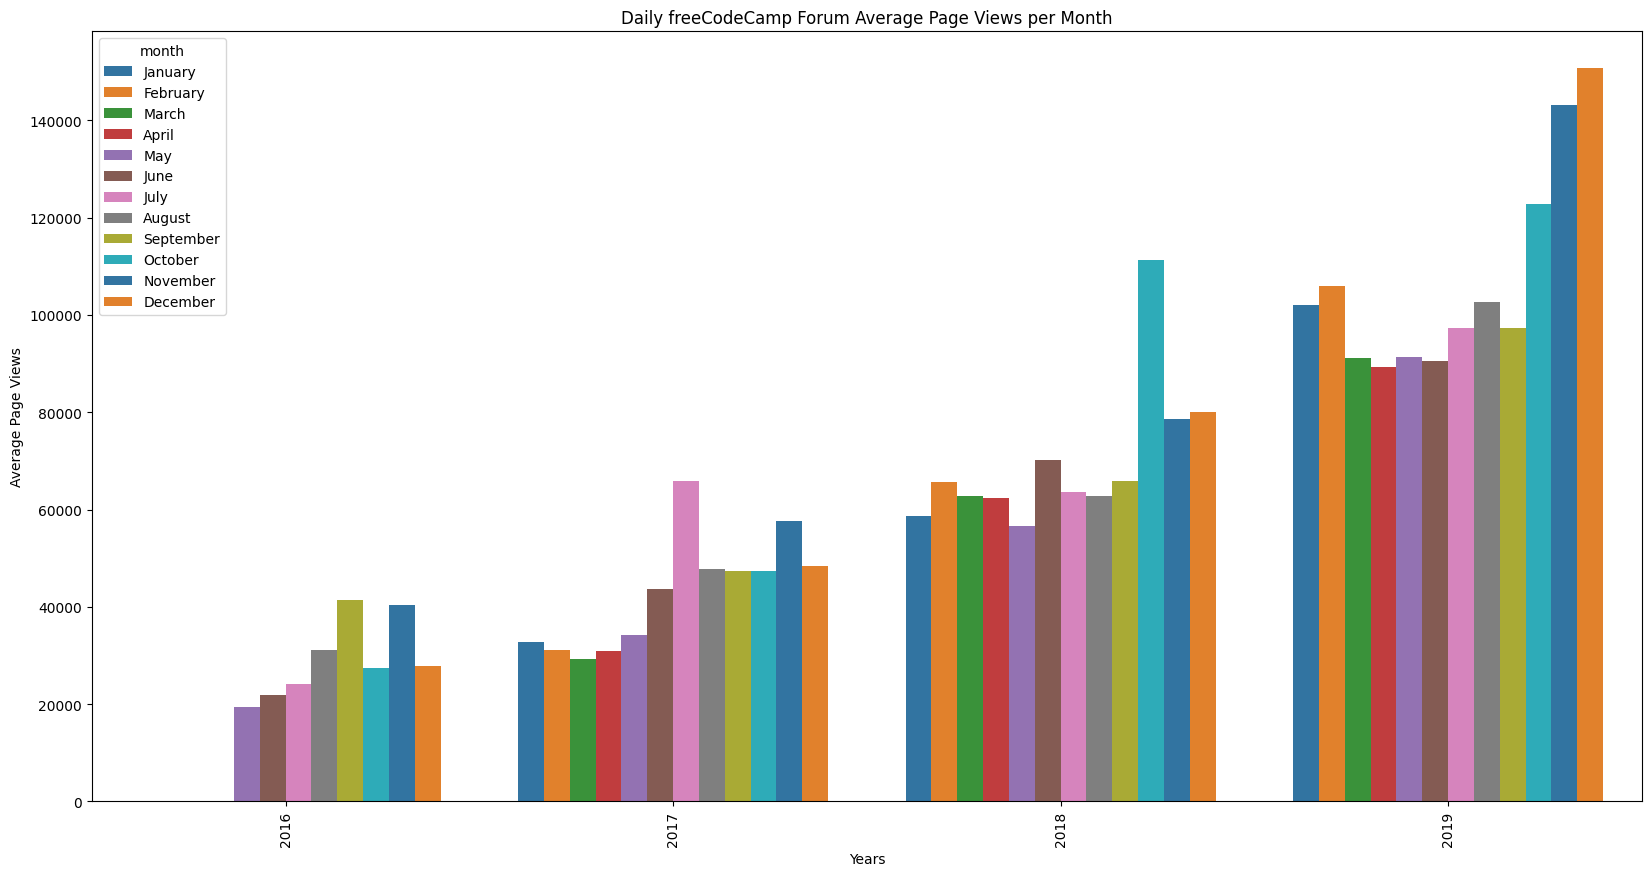

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

sns.barplot(data=df_bar, x="year", y="average_page_views", hue="month", palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(ylabel='Average Page Views',xlabel='Years')

In [90]:
df_box = df.copy()


In [91]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Page Views')]

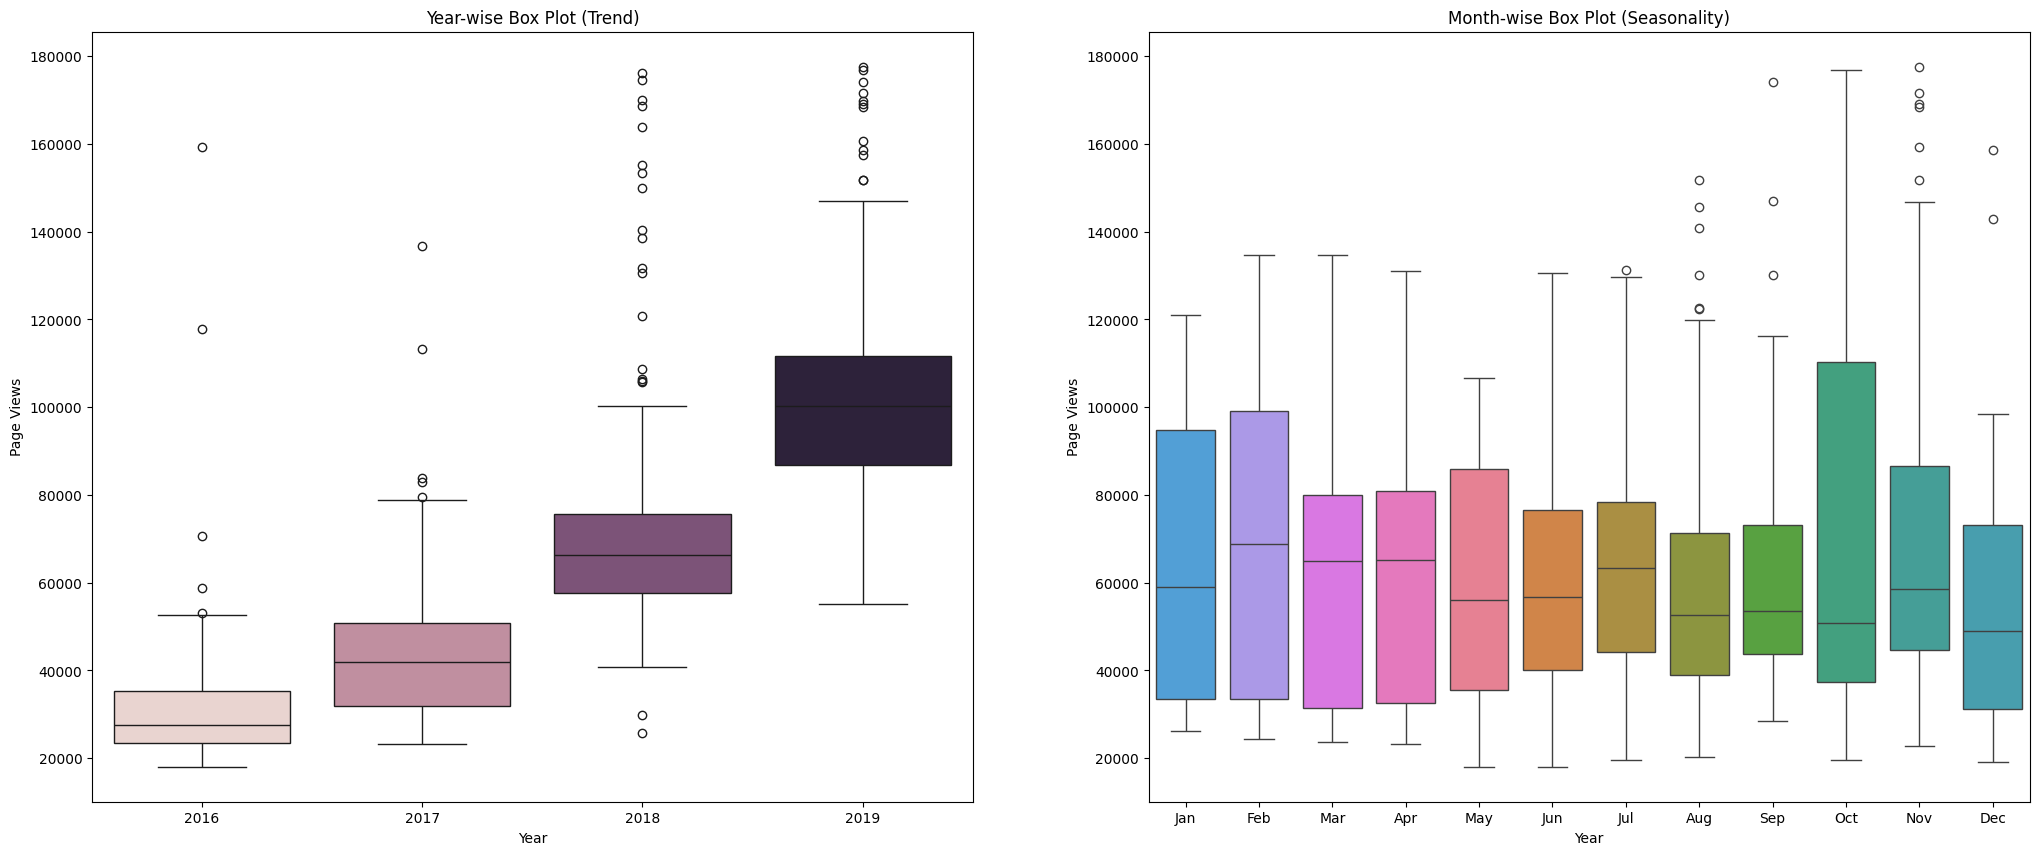

In [ ]:
# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
    
# Yearly boxplot
sns.boxplot(data=df_box, x='year', y='value', ax=ax[0],hue='year',legend=False)
ax[0].set(title='Year-wise Box Plot (Trend)',xlabel='Year',ylabel='Page Views')
    
# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x='month', y='value', order=month_order, ax=ax[1], hue='month',legend=False)
ax[1].set(title='Month-wise Box Plot (Seasonality)',xlabel='Year',ylabel='Page Views')
